# Bokeh : interactivity by default

In Jupyterlab : need version > 3.0
Else, it works fine in jupyter notebook

In [18]:
import pandas as pd
import numpy as np
import datetime

In [2]:
dataframe = pd.read_pickle("./data/THB_data.pkl").dropna()

mask = dataframe.index < datetime.datetime(2007,4,1)

small_dataframe = dataframe.iloc[mask]
small_dataframe.head()

,Bx,By,Bz,Np,Vx,Vy,Vz,Tp
2007-03-07 17:56:00,6.748950,-2.432548,14.107735,17.896076,3.322925,-100.716929,-276.617694,2.718395e+06
2007-03-07 17:57:00,6.822725,-3.480312,15.261338,77.188804,11.775027,26.851344,-81.346872,3.454449e+06
2007-03-07 17:58:00,5.256876,-2.683442,15.043352,58.404967,-9.468616,100.423579,-23.419666,3.028418e+06
2007-03-07 17:59:00,5.085039,-3.154718,16.192981,35.274029,-0.098382,135.313390,250.618605,2.746372e+06
2007-03-07 18:01:00,3.884535,-4.839686,12.379301,6.945407,-18.534470,-150.424068,-382.918429,5.036530e+06


To use bokeh, you will need to import quite some stuffs

In [3]:
import bokeh.plotting as plt  # a bit libe matplotly.pyplot 
from bokeh.io import output_notebook, output_file

In [4]:
output_notebook()  # a bit like %matplotlib widget

Loading BokehJS ...

In [61]:
p = plt.figure()  # This is a Bokeh figure !

p.line(x=small_dataframe.index, y=small_dataframe.Bx)

plt.show(p)

## improving the figure

Let start by fixing the datetime legend and the line width, adding legends and so on

In [8]:
p = plt.figure(x_axis_type="datetime", title="Magentic field measurment")  # This is a Bokeh figure !

p.line(x=small_dataframe.index, y=small_dataframe.Bx, line_width=2, legend_label="Bx")
p.xaxis.axis_label = "date of the measurment"
p.yaxis.axis_label = "B field [unit]"
plt.show(p)

# quick interactions
Bokeh is meant to be interactive... Let see that in action !

In [62]:
TOOLS = ["hover","pan","crosshair"]

p = plt.figure(x_axis_type="datetime", title="Magentic field measurment", tools=TOOLS)  # This is a Bokeh figure !

bxline = p.line(x=small_dataframe.index, y=small_dataframe.Bx, line_width=2, legend_label="Bx", color='#1f77b4')
byline = p.line(x=small_dataframe.index, y=small_dataframe.By, line_width=2, legend_label="By", color='#ff7f0e')


p.xaxis.axis_label = "date of the measurment"
p.yaxis.axis_label = "B field [unit]"

p.legend.click_policy="hide" # This only will add the legend interaction ! Use "mute" to just chang ethe alpha of the line

plt.show(p)

We can improve any tools ! For exemple the hover tool :

In [63]:
from bokeh.models.tools import HoverTool, PanTool, BoxZoomTool

In [64]:
myHoverTool = HoverTool(
    tooltips=[
        ( 'date',   '$x{%F}'            ),
        ( 'B field',  '@{y}' ),
    ],

    formatters={
        '$x'        : 'datetime', # use 'datetime' formatter for '@date' field
                                     # use default 'numeral' formatter for other fields
    },

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
)


In [65]:
p.tools = []
p.add_tools(myHoverTool)
p.add_tools(BoxZoomTool())
p.add_tools(PanTool())

plt.show(p)

# Exporting to JS

There are sever ways to export to JS / HTLM :

1. export a html standalone static page
2. export as frame
3. export the componantes as JS scripts, to be loaded whenever you want



In [15]:
from bokeh.io import save

In [16]:
output_file("./simple_dataframe.html")

In [17]:
save(p)

'/home/tavant/data_viz_interact/simple_dataframe.html'

# Can we have more interaction ?

First, the ColumnDataSource onject : that will be shared between all the plots

In [20]:
from bokeh.models import ColumnDataSource

source = ColumnDataSource(small_dataframe)

In [21]:
source.data

{'index': array(['2007-03-07T17:56:00.000000000', '2007-03-07T17:57:00.000000000',
        '2007-03-07T17:58:00.000000000', ...,
        '2007-03-31T10:08:00.000000000', '2007-03-31T10:09:00.000000000',
        '2007-03-31T10:10:00.000000000'], dtype='datetime64[ns]'),
 'Bx': array([  6.74895048,   6.8227253 ,   5.25687618, ..., -27.53673013,
        -27.94752407, -28.50107479]),
 'By': array([-2.43254805, -3.48031235, -2.68344159, ..., 22.52524741,
        22.86930799, 23.18289566]),
 'Bz': array([14.10773468, 15.261338  , 15.04335175, ..., 79.05515226,
        79.97013664, 80.61917114]),
 'Np': array([17.89607595, 77.18880367, 58.40496674, ...,  0.40704266,
         0.40347093,  0.39927824]),
 'Vx': array([ 3.3229248 , 11.7750268 , -9.46861553, ..., -5.23132705,
        -8.1820366 , -5.60320665]),
 'Vy': array([-100.71692886,   26.85134411,  100.42357941, ...,    0.49460151,
          -2.18415406,   -1.14776511]),
 'Vz': array([-2.76617694e+02, -8.13468723e+01, -2.34196663e+01, ...,


Now, the HoveTool of before can used the other data colmuns !

In [23]:
p = plt.figure(x_axis_type="datetime")

p.line(x="index", y='Bx', line_width=2, source=source, legend_label='Bx')
p.line(x="index", y='By', line_width=2, source=source, color="red", legend_label='By')
p.line(x="index", y='Bz', line_width=2, source=source, color="green", legend_label='Bz')


p.title.text = 'Magnetic field measurments'

p.yaxis.axis_label = 'B files [Unit]'
p.legend.click_policy="hide"


ht = HoverTool(
    tooltips=[
        ( 'date',   '@index{%F}'            ),
        ( 'Vx',  '@{Vx}{0.2f}' ), # use @{ } for field names with spaces
        ( 'Bfield',  '$y{0.2f}' ), 
        
    ],

    formatters={
        '@index'        : 'datetime', # use 'datetime' formatter for '@date' field
                                     # use default 'numeral' formatter for other fields
    },

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
)

p.add_tools(ht)

plt.show(p)

And the data source can be shared between several plots !

In [25]:
from bokeh.layouts import gridplot

In [30]:

source = ColumnDataSource(small_dataframe)

TOOLS = "help,pan,wheel_zoom,box_zoom,reset"

# create a new plot and add a renderer
left = plt.figure(x_axis_type="datetime",tools=TOOLS, plot_width=300, plot_height=300, title="Bx [unit]")
left.line('index', 'Bx', source=source, line_width=2)


# create another new plot and add a renderer
right = plt.figure(x_axis_type="datetime",tools=TOOLS, plot_width=300, plot_height=300, title="By [unit]",
               x_range=left.x_range, y_range=left.y_range,)
right.line('index', 'By', source=source, line_width=2)


ht = HoverTool(
    tooltips=[
        ( 'date',   '@index{%F}'            ),
        ( 'Vx',  '@{Vx}{0.2f}' ), # use @{ } for field names with spaces
        ( 'Bfield',  '$y{0.2f}' ), 
        
    ],

    formatters={
        '@index'        : 'datetime', # use 'datetime' formatter for '@date' field
                                     # use default 'numeral' formatter for other fields
    },

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
)

left.add_tools(ht)
right.add_tools(ht)


p = gridplot([[left, right]])


plt.show(p)

We can also select the data across the figures 

In [31]:
TOOLS = "box_select,lasso_select,help,pan,wheel_zoom,box_zoom,reset"

# create a new plot and add a renderer
left = plt.figure(x_axis_type="datetime",tools=TOOLS, plot_width=300, plot_height=300, title="Bx [unit]")
left.circle('index', 'Bx', source=source)


# create another new plot and add a renderer
right = plt.figure(x_axis_type="datetime",tools=TOOLS, plot_width=300, plot_height=300, title="By [unit]",
               x_range=left.x_range, y_range=left.y_range,)
right.circle('index', 'By', source=source)


p = gridplot([[left, right]])

plt.show(p)

## Interaction from Bokeh to Python

**/!\ Does not work yet on JupyterLab**




In [33]:
from bokeh.models import CustomJS

In [53]:
dfselected = pd.DataFrame()
retour_selected_index = CustomJS(args=dict(p=p), code="""
        console.log(cb_obj)
        var d1 = cb_obj.indices;
        console.log(d1)
        var kernel = IPython.notebook.kernel;
        IPython.notebook.kernel.execute("inds = " + d1);
        IPython.notebook.kernel.execute("dfselected = small_dataframe.iloc[list(inds)]");

        """
)

source.selected.js_on_change("indices", retour_selected_index)

plt.show(p)

In [57]:
dfselected.head()

,Bx,By,Bz,Np,Vx,Vy,Vz,Tp
2007-03-15 22:51:00,-5539.727051,-3901.832520,3487.948486,0.010253,6.392540,16.216881,-6.584314,1.402791e+07
2007-03-15 22:57:00,-5539.727051,-10810.533203,4941.598633,0.010253,6.392540,16.216881,-6.894376,1.396377e+07
2007-03-15 23:04:00,-5194.140137,-23074.058594,8662.905273,0.271768,-35.625019,-0.461000,-6.894376,2.475742e+05
2007-03-17 06:03:00,-4060.337891,-1676.693848,5801.721680,0.000000,10.481024,29.697418,-53.860538,1.081359e+07
2007-03-17 06:10:00,-4060.337891,-7785.592773,7770.434570,0.000000,6.257568,26.096106,-53.860538,1.011711e+07


<AxesSubplot:xlabel='Bx', ylabel='By'>

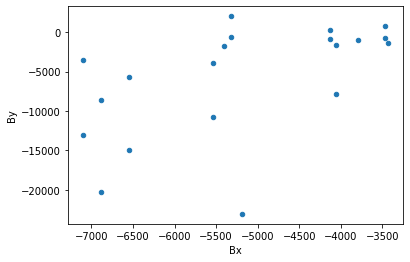

In [56]:
dfselected.plot.scatter("Bx", "By")

An even bigger interaction

In [59]:
# Generate linked plots + TABLE displaying data

from bokeh.layouts import row
from bokeh.layouts import grid
from bokeh.models import CustomJS, ColumnDataSource
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.models import DateFormatter




# create first subplot
plot_width = 400
plot_height = 400

s1 = ColumnDataSource(data=small_dataframe)
fig01 = plt.figure(x_axis_type="datetime",
    plot_width=plot_width,
    plot_height=plot_height,
    tools=["lasso_select", "reset", "save"],
    title="Select Here",
)
fig01.circle("index", "Bx", source=s1, alpha=0.6)

# create second subplot
s2 = ColumnDataSource(data=dict(x=[], Bx=[], By=[], Bz=[]))

# demo smart error msg:  `box_zoom`, vs `BoxZoomTool`
fig02 = plt.figure(x_axis_type="datetime",
    plot_width=400,
    plot_height=400,
    x_range=fig01.x_range,
    y_range=fig01.y_range,
    tools=["box_zoom", "wheel_zoom", "reset", "save"],
    title="Watch Here",
)

fig02.circle("x", "Bx", source=s2, alpha=0.6, color="firebrick")

# create dynamic table of selected points
datefmt = DateFormatter(format="%d/%m/%Y %H:%M:%S")
columns = [
    TableColumn(field="x", title="TimeStamp", formatter=datefmt),
    TableColumn(field="Bx", title="Bx"),
]

table = DataTable(
    source=s2,
    columns=columns,
    width=400,
    height=600,
    sortable=True,
    selectable=True,
    editable=True,
)

# fancy javascript to link subplots
# js pushes selected points into ColumnDataSource of 2nd plot
# inspiration for this from a few sources:
# credit: https://stackoverflow.com/users/1097752/iolsmit via: https://stackoverflow.com/questions/48982260/bokeh-lasso-select-to-table-update
# credit: https://stackoverflow.com/users/8412027/joris via: https://stackoverflow.com/questions/34164587/get-selected-data-contained-within-box-select-tool-in-bokeh

s1.selected.js_on_change(
    "indices",
    CustomJS(
        args=dict(s1=s1, s2=s2, table=table),
        code="""
        var inds = cb_obj.indices;
        var d1 = s1.data;
        var d2 = s2.data;
        d2['x'] = []
        d2['By'] = []
        d2['Bx'] = []
        d2['Bz'] = []

        for (var i = 0; i < inds.length; i++) {
            d2['x'].push(d1['index'][inds[i]])
            d2['Bx'].push(d1['Bx'][inds[i]])
            d2['By'].push(d1['By'][inds[i]])
            d2['Bz'].push(d1['Bz'][inds[i]])
        }
        s2.change.emit();
        table.change.emit();


    """,
    ),
)

# add Hover tool
# define what is displayed in the tooltip
tooltips = [
    ("X:", "@x"),
    ("Y:", "@y"),
    ("static text", "static text"),
]

fig02.add_tools(HoverTool(tooltips=tooltips))

# display results
# demo linked plots
# demo zooms and reset
# demo hover tool
# demo table
# demo save selected results to file

layout = grid([fig01, fig02, table], ncols=3)

plt.show(layout)

In [60]:
from bokeh.plotting import output_file, save

output_file("bokeh_datafram_table.html")
save(layout)

'/home/tavant/data_viz_interact/bokeh_datafram_table.html'

# For bigger datasets :

- you will need to send the bit-map to the browser, not the actual data
- `Datashader` can do it with Bokej
- `Holoview` is another solution for both Bokeh and matplotlib

However, a compuation server side is needed now.